In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
df=pd.read_csv("data/measurements_clean.csv")

In [178]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


# 1. Linear regression para predecir el consumo 

In [180]:
# Elimina las columnas categoricas para la regresion lineal
df1=df.drop(columns="gas_type")

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=["consume"]), df1["consume"])

In [187]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [188]:
tr=lr.predict(X_train)
te=lr.predict(X_test)

In [189]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.8304108650433377, Test mse:0.9082194565990428, Train rmse:0.9112688215029293, Test rmse:0.95300548613271, Train r2 score:0.23889852391889554, Test r2 score:0.07805871779138174


In [171]:
# Las predicciones no son buenas porque r2 es muy próximo a 0 y el rmse es muy próximo a 1

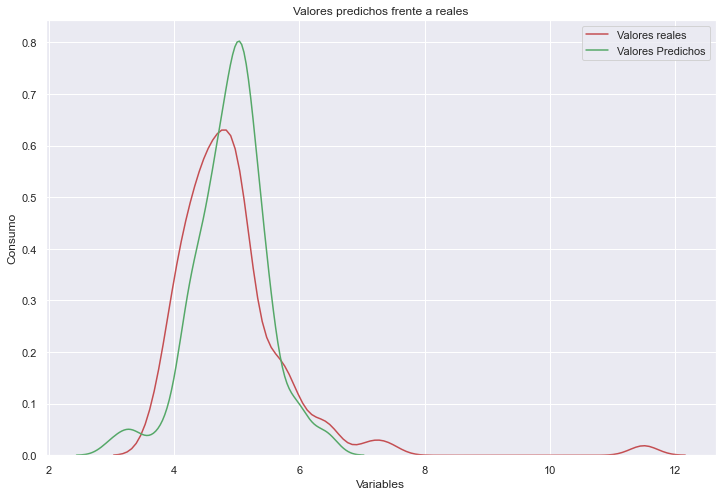

In [185]:
# Visualización de los valores predichos y los reales
sns.set()
width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Valores reales")
ax2 = sns.distplot(te, hist=False, color="g", label="Valores Predichos", ax=ax1)

plt.title("Valores predichos frente a reales")
plt.xlabel("Variables")
plt.ylabel("Consumo")

plt.show()


# Se ajustan más o menos a los valores predichos

# 2. KNN (Nearest Neighbors) Regressor para predecir consumo

In [190]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [191]:
tr=knn.predict(X_train)
te=knn.predict(X_test)

In [192]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.32640687285223363, Test mse:0.3812701030927835, Train rmse:0.5713202892005793, Test rmse:0.6174707305555329, Train r2 score:0.7008363411551854, Test r2 score:0.6129694809342148


In [176]:
# El rmse es un poco alto pero el r2 score es más o menos bueno, ver con un gráfico como se ajustan los valores

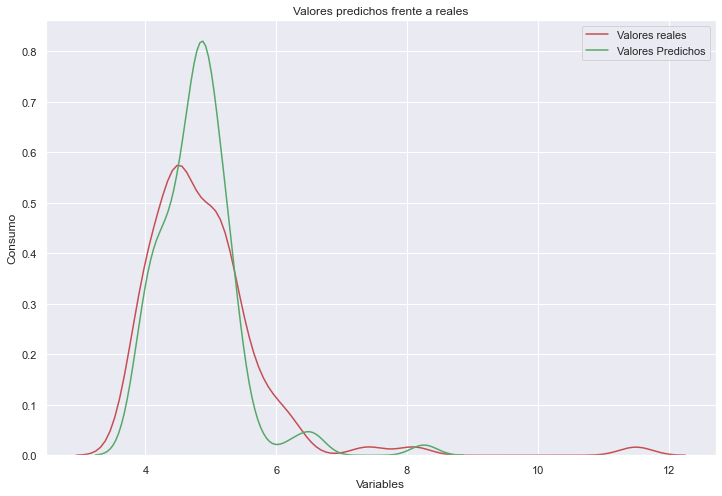

In [193]:
# Visualización de los valores predichos y los reales

width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Valores reales")
ax2 = sns.distplot(te, hist=False, color="g", label="Valores Predichos", ax=ax1)

plt.title("Valores predichos frente a reales")
plt.xlabel("Variables")
plt.ylabel("Consumo")

plt.show()

# Se ajustan más o menos bien los valores predichos a los reales

# 3. Decision Tree Regressor para predecir el consumo

In [194]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [195]:
tr=dtree.predict(X_train)
te=dtree.predict(X_test)

In [196]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.005463917525773191, Test mse:0.4860567010309278, Train rmse:0.07391831657832307, Test rmse:0.6971776681957963, Train r2 score:0.9949921227321197, Test r2 score:0.5065997156099498


In [ ]:
# Hay overfitting porque los valores de train son mucho mejores que los del test

# 4. Random Forest Regressor para predecir el consumo

In [197]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
tr=regr.predict(X_train)
te=regr.predict(X_test)

In [199]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.07431078562948534, Test mse:0.3144767435470585, Train rmse:0.27260004700932344, Test rmse:0.5607822603712234, Train r2 score:0.9318914876813466, Test r2 score:0.6807719873605805


In [ ]:
# Hay overfitting

# 5. Linear Regression para predecir el tipo de combustible

In [200]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [201]:
df["gas_type"].replace(["E10", "SP98"], [0,1], inplace=True)
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [202]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["gas_type"]), df["gas_type"])

In [203]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [204]:
tr=lr.predict(X_train)
te=lr.predict(X_test)

In [205]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.22734626761629428, Test mse:0.24657905232842095, Train rmse:0.47680841814747177, Test rmse:0.49656726868413403, Train r2 score:0.056926164004339364, Test r2 score:-0.004355975479702456


In [ ]:
# El rmse es muy alto y el r2 score demasiado bajo

# 6. KNN (Nearest Neighbors) Regressor para predecir tipo combustible

In [206]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [207]:
tr=knn.predict(X_train)
te=knn.predict(X_test)

In [208]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.1697594501718213, Test mse:0.2948453608247423, Train rmse:0.4120187497818774, Test rmse:0.5429966489995516, Train r2 score:0.29580679925541287, Test r2 score:-0.200952380952381


In [ ]:
# El rmse es muy alto y el r2 score muy bajo

# 7. Decision Tree Regressor para predecir el tipo de combustible

In [209]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [210]:
tr=dtree.predict(X_train)
te=dtree.predict(X_test)

In [212]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)
print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.0, Test mse:0.3711340206185567, Train rmse:0.0, Test rmse:0.6092076990801715, Train r2 score:1.0, Test r2 score:-0.5116883116883117


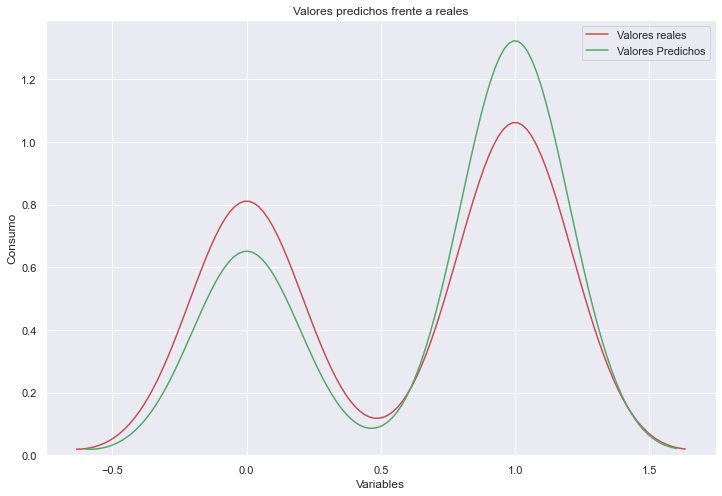

In [213]:
# Visualización de los valores predichos y los reales
width = 12
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Valores reales")
ax2 = sns.distplot(te, hist=False, color="g", label="Valores Predichos", ax=ax1)

plt.title("Valores predichos frente a reales")
plt.xlabel("Variables")
plt.ylabel("Consumo")

plt.show()
plt.close()

# Los datos se ajustan muy bien porque hay overfitting

# 8. Random Forest Regressor para predecir el tipo de combustible

In [214]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [215]:
tr=regr.predict(X_train)
te=regr.predict(X_test)

In [216]:
mse_train = mean_squared_error(y_train, tr)
mse_test = mean_squared_error(y_test, te)

rmse_train=np.sqrt(mean_squared_error(y_train, tr))
rmse_test=np.sqrt(mean_squared_error(y_test, te))

r2_test=r2_score(y_train, tr)
r2_train=r2_score(y_test, te)

print(f"Train mse:{mse_train}, Test mse:{mse_test}, Train rmse:{rmse_train}, Test rmse:{rmse_test}, Train r2 score:{r2_test}, Test r2 score:{r2_train}")

Train mse:0.03160893470790378, Test mse:0.21036701030927835, Train rmse:0.17778901739956768, Test rmse:0.45865783576570274, Train r2 score:0.8688803664152053, Test r2 score:0.14314147186147186


In [ ]:
# Hay overfitting

# 6. Conclusiones

El modelo KNN Regressor es el mejor método para predecir el mejor tipo de combustible 

El tipo de combustible mejor es el SP98 porque se puede recorrer más distancia con él